## EDA of PMC articles

### Setup and pulling PMC articles from HuggingFace Hub

In [ ]:
''' Load libraries '''

import numpy as np
import matplotlib.pyplot as plt
import os
import re
import csv
import seaborn as sns
import pandas as pd
import shutil
import json

import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Clear hugging face cache 
hf_cache_dir = "/root/.cache/huggingface"
shutil.rmtree(hf_cache_dir, ignore_errors=True)

print("Hugging Face cache cleared.")

✅ Hugging Face cache cleared.


In [15]:
# Log in to huggingface
from huggingface_hub import login, notebook_login, HfApi
login(token= os.getenv('HUGGINGFACE_TOKEN'))

In [ ]:
from huggingface_hub import snapshot_download
hf_snapshot_dir = snapshot_download(repo_id="choo-c102/pc_pmc_abstract_conclusion", repo_type = "dataset", allow_patterns="*.json")

Fetching 254 files:   0%|          | 0/254 [00:00<?, ?it/s]

PMC10139686.json:   0%|          | 0.00/3.84k [00:00<?, ?B/s]

PMC10051263.json:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

PMC10093482.json:   0%|          | 0.00/4.14k [00:00<?, ?B/s]

PMC10080704.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

PMC10162946.json:   0%|          | 0.00/2.31k [00:00<?, ?B/s]

PMC10078032.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

PMC10047484.json:   0%|          | 0.00/3.86k [00:00<?, ?B/s]

PMC10177101.json:   0%|          | 0.00/5.09k [00:00<?, ?B/s]

PMC10214075.json:   0%|          | 0.00/1.87k [00:00<?, ?B/s]

PMC10251968.json:   0%|          | 0.00/2.97k [00:00<?, ?B/s]

PMC10406543.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

PMC10422698.json:   0%|          | 0.00/3.00k [00:00<?, ?B/s]

PMC10374677.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

PMC10380009.json:   0%|          | 0.00/2.98k [00:00<?, ?B/s]

PMC10393853.json:   0%|          | 0.00/3.07k [00:00<?, ?B/s]

PMC10485404.json:   0%|          | 0.00/2.98k [00:00<?, ?B/s]

PMC10518105.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

PMC10587919.json:   0%|          | 0.00/2.95k [00:00<?, ?B/s]

PMC10605673.json:   0%|          | 0.00/3.34k [00:00<?, ?B/s]

PMC10628391.json:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

PMC10670364.json:   0%|          | 0.00/3.46k [00:00<?, ?B/s]

PMC10661893.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

PMC10705283.json:   0%|          | 0.00/4.51k [00:00<?, ?B/s]

PMC10712702.json:   0%|          | 0.00/2.77k [00:00<?, ?B/s]

PMC10741570.json:   0%|          | 0.00/3.21k [00:00<?, ?B/s]

PMC10830814.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

PMC10885377.json:   0%|          | 0.00/3.15k [00:00<?, ?B/s]

PMC10879602.json:   0%|          | 0.00/2.61k [00:00<?, ?B/s]

PMC10928015.json:   0%|          | 0.00/2.78k [00:00<?, ?B/s]

PMC10930540.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

PMC10954243.json:   0%|          | 0.00/2.78k [00:00<?, ?B/s]

PMC10932679.json:   0%|          | 0.00/2.26k [00:00<?, ?B/s]

PMC11060269.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

PMC11077374.json:   0%|          | 0.00/2.33k [00:00<?, ?B/s]

PMC11141771.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

PMC11119140.json:   0%|          | 0.00/3.00k [00:00<?, ?B/s]

PMC11147847.json:   0%|          | 0.00/2.75k [00:00<?, ?B/s]

PMC11171605.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

PMC11185363.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

PMC11088938.json:   0%|          | 0.00/2.11k [00:00<?, ?B/s]

PMC11240790.json:   0%|          | 0.00/3.30k [00:00<?, ?B/s]

PMC11256648.json:   0%|          | 0.00/2.96k [00:00<?, ?B/s]

PMC11286297.json:   0%|          | 0.00/2.14k [00:00<?, ?B/s]

PMC11319747.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

PMC11302827.json:   0%|          | 0.00/3.64k [00:00<?, ?B/s]

PMC11201547.json:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

PMC11357715.json:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

PMC11235423.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

PMC11389906.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

PMC11390448.json:   0%|          | 0.00/3.23k [00:00<?, ?B/s]

PMC11442445.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

PMC11416134.json:   0%|          | 0.00/3.06k [00:00<?, ?B/s]

PMC11416195.json:   0%|          | 0.00/2.60k [00:00<?, ?B/s]

PMC11470284.json:   0%|          | 0.00/3.39k [00:00<?, ?B/s]

PMC11487006.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

PMC11491967.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

PMC11504279.json:   0%|          | 0.00/2.16k [00:00<?, ?B/s]

PMC11504882.json:   0%|          | 0.00/2.31k [00:00<?, ?B/s]

PMC11566511.json:   0%|          | 0.00/2.71k [00:00<?, ?B/s]

PMC11617590.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

PMC11664036.json:   0%|          | 0.00/3.33k [00:00<?, ?B/s]

PMC11671877.json:   0%|          | 0.00/3.13k [00:00<?, ?B/s]

PMC11741095.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

PMC11686566.json:   0%|          | 0.00/3.38k [00:00<?, ?B/s]

PMC11781101.json:   0%|          | 0.00/2.80k [00:00<?, ?B/s]

PMC11807416.json:   0%|          | 0.00/2.95k [00:00<?, ?B/s]

PMC11843702.json:   0%|          | 0.00/2.63k [00:00<?, ?B/s]

PMC11877337.json:   0%|          | 0.00/3.93k [00:00<?, ?B/s]

PMC11898638.json:   0%|          | 0.00/5.25k [00:00<?, ?B/s]

PMC11909682.json:   0%|          | 0.00/2.56k [00:00<?, ?B/s]

PMC11978711.json:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

PMC11930888.json:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

PMC11981310.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

PMC11995310.json:   0%|          | 0.00/2.48k [00:00<?, ?B/s]

PMC12000257.json:   0%|          | 0.00/2.75k [00:00<?, ?B/s]

PMC11997321.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

PMC12031639.json:   0%|          | 0.00/3.19k [00:00<?, ?B/s]

PMC12049877.json:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

PMC12071172.json:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

PMC12078320.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

PMC12090895.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

PMC12086372.json:   0%|          | 0.00/3.34k [00:00<?, ?B/s]

PMC12112120.json:   0%|          | 0.00/2.53k [00:00<?, ?B/s]

PMC12141374.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

PMC12149456.json:   0%|          | 0.00/3.04k [00:00<?, ?B/s]

PMC12162384.json:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

PMC12188535.json:   0%|          | 0.00/4.22k [00:00<?, ?B/s]

PMC1751121.json:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

PMC2857873.json:   0%|          | 0.00/11.7k [00:00<?, ?B/s]

PMC3388562.json:   0%|          | 0.00/2.23k [00:00<?, ?B/s]

PMC3496532.json:   0%|          | 0.00/2.65k [00:00<?, ?B/s]

PMC3522022.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

PMC3546942.json:   0%|          | 0.00/3.61k [00:00<?, ?B/s]

PMC3641289.json:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

PMC3672012.json:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

PMC3757398.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

PMC3756374.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

PMC3884621.json:   0%|          | 0.00/2.89k [00:00<?, ?B/s]

PMC3932002.json:   0%|          | 0.00/2.49k [00:00<?, ?B/s]

PMC4014591.json:   0%|          | 0.00/2.85k [00:00<?, ?B/s]

PMC4029741.json:   0%|          | 0.00/2.39k [00:00<?, ?B/s]

PMC4122139.json:   0%|          | 0.00/2.27k [00:00<?, ?B/s]

PMC4233091.json:   0%|          | 0.00/2.31k [00:00<?, ?B/s]

PMC4304507.json:   0%|          | 0.00/3.45k [00:00<?, ?B/s]

PMC4362006.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

PMC4352626.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

PMC4462555.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

PMC4486738.json:   0%|          | 0.00/3.23k [00:00<?, ?B/s]

PMC4547403.json:   0%|          | 0.00/1.96k [00:00<?, ?B/s]

PMC4568900.json:   0%|          | 0.00/3.48k [00:00<?, ?B/s]

PMC4627359.json:   0%|          | 0.00/2.84k [00:00<?, ?B/s]

PMC4748916.json:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

PMC4780462.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

PMC4765158.json:   0%|          | 0.00/3.32k [00:00<?, ?B/s]

PMC4849685.json:   0%|          | 0.00/2.46k [00:00<?, ?B/s]

PMC4855757.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

PMC4971692.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

PMC5049564.json:   0%|          | 0.00/1.86k [00:00<?, ?B/s]

PMC5093225.json:   0%|          | 0.00/2.29k [00:00<?, ?B/s]

PMC5221644.json:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

PMC5237291.json:   0%|          | 0.00/2.61k [00:00<?, ?B/s]

PMC5241525.json:   0%|          | 0.00/3.82k [00:00<?, ?B/s]

PMC5372906.json:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

PMC5384142.json:   0%|          | 0.00/2.68k [00:00<?, ?B/s]

PMC5472554.json:   0%|          | 0.00/3.63k [00:00<?, ?B/s]

PMC5486521.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

PMC5588944.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

PMC5708962.json:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

PMC5728835.json:   0%|          | 0.00/3.39k [00:00<?, ?B/s]

PMC5756395.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

PMC5865497.json:   0%|          | 0.00/1.90k [00:00<?, ?B/s]

PMC5466735.json:   0%|          | 0.00/2.73k [00:00<?, ?B/s]

PMC5868586.json:   0%|          | 0.00/1.81k [00:00<?, ?B/s]

PMC5893263.json:   0%|          | 0.00/2.96k [00:00<?, ?B/s]

PMC5912007.json:   0%|          | 0.00/2.87k [00:00<?, ?B/s]

PMC5968243.json:   0%|          | 0.00/1.89k [00:00<?, ?B/s]

PMC6149195.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

PMC6134575.json:   0%|          | 0.00/2.48k [00:00<?, ?B/s]

PMC6162953.json:   0%|          | 0.00/3.54k [00:00<?, ?B/s]

PMC6212542.json:   0%|          | 0.00/2.81k [00:00<?, ?B/s]

PMC6299603.json:   0%|          | 0.00/2.73k [00:00<?, ?B/s]

PMC6250924.json:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

PMC6320463.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

PMC6350289.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

PMC6378466.json:   0%|          | 0.00/1.95k [00:00<?, ?B/s]

PMC6357627.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

PMC6396775.json:   0%|          | 0.00/2.42k [00:00<?, ?B/s]

PMC6420955.json:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

PMC6441154.json:   0%|          | 0.00/4.33k [00:00<?, ?B/s]

PMC6502190.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

PMC6507030.json:   0%|          | 0.00/2.65k [00:00<?, ?B/s]

PMC6559437.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

PMC6584982.json:   0%|          | 0.00/3.46k [00:00<?, ?B/s]

PMC6592596.json:   0%|          | 0.00/2.52k [00:00<?, ?B/s]

PMC6617267.json:   0%|          | 0.00/1.87k [00:00<?, ?B/s]

PMC6713682.json:   0%|          | 0.00/3.29k [00:00<?, ?B/s]

PMC6722558.json:   0%|          | 0.00/2.67k [00:00<?, ?B/s]

PMC6749961.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

PMC6796693.json:   0%|          | 0.00/2.86k [00:00<?, ?B/s]

PMC6803577.json:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

PMC6817490.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

PMC6839088.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

PMC6843405.json:   0%|          | 0.00/4.20k [00:00<?, ?B/s]

PMC6852709.json:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

PMC6895569.json:   0%|          | 0.00/3.06k [00:00<?, ?B/s]

PMC6943146.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

PMC7066303.json:   0%|          | 0.00/2.74k [00:00<?, ?B/s]

PMC6910167.json:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

PMC7072019.json:   0%|          | 0.00/2.46k [00:00<?, ?B/s]

PMC7080689.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

PMC7156736.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

PMC7236181.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

PMC7281628.json:   0%|          | 0.00/2.17k [00:00<?, ?B/s]

PMC7282238.json:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

PMC7330738.json:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

PMC7347036.json:   0%|          | 0.00/3.10k [00:00<?, ?B/s]

PMC7388804.json:   0%|          | 0.00/2.75k [00:00<?, ?B/s]

PMC7403883.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

PMC7434629.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

PMC7436982.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

PMC7440208.json:   0%|          | 0.00/2.66k [00:00<?, ?B/s]

PMC7689756.json:   0%|          | 0.00/2.26k [00:00<?, ?B/s]

PMC7677881.json:   0%|          | 0.00/2.18k [00:00<?, ?B/s]

PMC7653048.json:   0%|          | 0.00/1.70k [00:00<?, ?B/s]

PMC7717574.json:   0%|          | 0.00/2.66k [00:00<?, ?B/s]

PMC7731834.json:   0%|          | 0.00/2.42k [00:00<?, ?B/s]

PMC7769744.json:   0%|          | 0.00/3.21k [00:00<?, ?B/s]

PMC7768873.json:   0%|          | 0.00/4.35k [00:00<?, ?B/s]

PMC7771041.json:   0%|          | 0.00/2.70k [00:00<?, ?B/s]

PMC7789059.json:   0%|          | 0.00/3.54k [00:00<?, ?B/s]

PMC7841623.json:   0%|          | 0.00/3.24k [00:00<?, ?B/s]

PMC7793745.json:   0%|          | 0.00/3.18k [00:00<?, ?B/s]

PMC7865852.json:   0%|          | 0.00/2.77k [00:00<?, ?B/s]

PMC7861334.json:   0%|          | 0.00/1.81k [00:00<?, ?B/s]

PMC8112949.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

PMC7876378.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

PMC7888169.json:   0%|          | 0.00/1.89k [00:00<?, ?B/s]

PMC8171946.json:   0%|          | 0.00/2.83k [00:00<?, ?B/s]

PMC8131866.json:   0%|          | 0.00/3.34k [00:00<?, ?B/s]

PMC8128017.json:   0%|          | 0.00/2.15k [00:00<?, ?B/s]

PMC8218365.json:   0%|          | 0.00/2.97k [00:00<?, ?B/s]

PMC8227498.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

PMC8267412.json:   0%|          | 0.00/3.05k [00:00<?, ?B/s]

PMC8316912.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

PMC8318663.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

PMC8362519.json:   0%|          | 0.00/2.46k [00:00<?, ?B/s]

PMC8411560.json:   0%|          | 0.00/2.12k [00:00<?, ?B/s]

PMC8371525.json:   0%|          | 0.00/5.29k [00:00<?, ?B/s]

PMC8444192.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

PMC8507697.json:   0%|          | 0.00/2.67k [00:00<?, ?B/s]

PMC8529923.json:   0%|          | 0.00/3.39k [00:00<?, ?B/s]

PMC8565992.json:   0%|          | 0.00/2.40k [00:00<?, ?B/s]

PMC8579871.json:   0%|          | 0.00/2.09k [00:00<?, ?B/s]

PMC8628685.json:   0%|          | 0.00/2.72k [00:00<?, ?B/s]

PMC8648660.json:   0%|          | 0.00/2.45k [00:00<?, ?B/s]

PMC8657010.json:   0%|          | 0.00/5.49k [00:00<?, ?B/s]

PMC8603447.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

PMC8726483.json:   0%|          | 0.00/2.00k [00:00<?, ?B/s]

PMC8794891.json:   0%|          | 0.00/2.39k [00:00<?, ?B/s]

PMC8867748.json:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

PMC8871200.json:   0%|          | 0.00/2.28k [00:00<?, ?B/s]

PMC8950951.json:   0%|          | 0.00/2.71k [00:00<?, ?B/s]

PMC9080991.json:   0%|          | 0.00/3.27k [00:00<?, ?B/s]

PMC9048490.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

PMC9090359.json:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

PMC9123808.json:   0%|          | 0.00/3.09k [00:00<?, ?B/s]

PMC9152722.json:   0%|          | 0.00/2.68k [00:00<?, ?B/s]

PMC9170865.json:   0%|          | 0.00/2.86k [00:00<?, ?B/s]

PMC9192299.json:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

PMC9200569.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

PMC9225738.json:   0%|          | 0.00/3.04k [00:00<?, ?B/s]

PMC9308974.json:   0%|          | 0.00/2.99k [00:00<?, ?B/s]

PMC9433056.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

PMC9451139.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

PMC9454856.json:   0%|          | 0.00/3.28k [00:00<?, ?B/s]

PMC9459213.json:   0%|          | 0.00/3.09k [00:00<?, ?B/s]

PMC9470333.json:   0%|          | 0.00/2.64k [00:00<?, ?B/s]

PMC9476854.json:   0%|          | 0.00/2.95k [00:00<?, ?B/s]

PMC9563634.json:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

PMC9652687.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

PMC9656492.json:   0%|          | 0.00/3.23k [00:00<?, ?B/s]

PMC9730569.json:   0%|          | 0.00/2.92k [00:00<?, ?B/s]

PMC9771849.json:   0%|          | 0.00/2.71k [00:00<?, ?B/s]

PMC9777348.json:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

PMC9602008.json:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

PMC9778676.json:   0%|          | 0.00/2.12k [00:00<?, ?B/s]

PMC9789314.json:   0%|          | 0.00/3.23k [00:00<?, ?B/s]

PMC9793126.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

PMC9885735.json:   0%|          | 0.00/2.84k [00:00<?, ?B/s]

PMC9806441.json:   0%|          | 0.00/2.72k [00:00<?, ?B/s]

PMC9893084.json:   0%|          | 0.00/3.04k [00:00<?, ?B/s]

PMC9897716.json:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

PMC9918012.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

PMC9913845.json:   0%|          | 0.00/4.37k [00:00<?, ?B/s]

In [ ]:
# Walk the directory tree and find all .json files
json_files = []
for root, dirs, files in os.walk(hf_snapshot_dir):
    for file in files:
        if file.endswith(".json"):
            json_files.append(os.path.join(root, file))

In [ ]:
#try loading 1 file

with open(json_files[1], 'r') as f:
        data = json.load(f)
        print(data.keys())
        print(data)

dict_keys(['pmcid', 'text'])
{'pmcid': 'PMC6852709', 'text': 'With the progress in surgical techniques and management of complications, pancreatic resection can be safely performed in experienced hospitals. Pancreatic resection enables surgeons to assess the effect of surgery for metastatic cases, even when there is limited information. In the present study we evaluated the role of primary tumor resection for metastatic pancreatic cancer (mPC) by using the Surveillance, Epidemiology and End Results (SEER) database.\n\nMetastatic pancreatic cancer patients treated at our hospital from 2004 to 2015 were identified. The effect of surgery on cancer-specific survival was assessed by restricted mean survival time (RMST) and stabilized inverse probability of treatment weight-adjusted analysis after propensity score matching (PSM).\n\nA total of 2694 mPC patients were included. Of this population, 365 adults underwent primary tumor resection. After propensity matching, postsurgical patients ha

### Count tokens and docs

In [ ]:
pmc_json_files = [f for f in os.listdir(hf_snapshot_dir) if f.endswith('.json')]

total_docs = len(pmc_json_files)
total_tokens = 0

for filename in pmc_json_files:
    with open(os.path.join(hf_snapshot_dir, filename), 'r', encoding='utf-8') as f:
        data = json.load(f)
        text = data.get('text', '')
        tokens = text.split()  # crude whitespace tokenizer
        total_tokens += len(tokens)

print("Total documents:", total_docs)
print("Total tokens:", total_tokens)

Total documents: 254
Total tokens: 98295


### MeSH Headings

In [ ]:
''' Explore MeSH headings of downloaded PubMed articles through its metadata file '''

from datasets import load_dataset
dataset = load_dataset("choo-c102/pubmed_medline_records_pc", use_auth_token=True)
records = dataset['train'].to_pandas()

records = records.dropna(subset = ["MeSH headings"]) #drop records with missing MeSH headings
records

,PMID,Title,Abstract,MeSH headings,Authors,Journal,Year,Month,Source,Country
0,40568369,Advanced Detection of Pancreatic Cancer Circul...,Background: Pancreatic ductal adenocarcinoma (...,"*Neoplastic Cells, Circulating/pathology/metab...",Dinari A; Ahmad HA; Oh S; Kim YH; Yoon J,Nanotheranostics,2025,NaN,Nanotheranostics. 2025 Jun 12;9(2):171-185. do...,Australia
3,40471466,Pancreatic Cancer Risk Assessment Tools in Pri...,BACKGROUND: Pancreatic cancer is the twelfth m...,Humans; *Pancreatic Neoplasms/diagnosis; Prima...,Claridge H; Cooke EA; Thomas SA; Greenwood N; ...,Journal of gastrointestinal cancer,2025,Jun,J Gastrointest Cancer. 2025 Jun 5;56(1):128. d...,United States
5,40392528,Anatomically resectable versus biologically bo...,BACKGROUND: The anatomically resectable pancre...,Humans; *Pancreatic Neoplasms/pathology/surger...,Belfiori G; De Stefano F; Tamburrino D; Gaspar...,BJS open,2025,May,BJS Open. 2025 May 7;9(3):zraf033. doi: 10.109...,England
6,40430018,Identification of Cancer Associated Fibroblast...,"Pancreatic cancer (PC) is highly aggressive, w...",Humans; *Pancreatic Neoplasms/genetics/patholo...,Zhou Y; Lu Y; Czubayko F; Chen J; Zheng S; Mo ...,International journal of molecular sciences,2025,May,Int J Mol Sci. 2025 May 19;26(10):4876. doi: 1...,Switzerland
8,40376004,Case Report: Combined PD-1 and tyrosine kinase...,Pancreatic cancer is characterized by a poor p...,Male; *Antineoplastic Combined Chemotherapy Pr...,Yang H; Ma Y; Zhang C; Leng Q; Cheng K; Zhao C...,Frontiers in immunology,2025,NaN,Front Immunol. 2025 May 1;16:1547388. doi: 10....,Switzerland
...,...,...,...,...,...,...,...,...,...,...
400,17194196,Palladin mutation causes familial pancreatic c...,BACKGROUND: Pancreatic cancer is a deadly dise...,Actinin/genetics; Adenocarcinoma/*genetics; Bl...,Pogue-Geile KL; Chen R; Bronner MP; Crnogorac-...,PLoS medicine,2006,Dec,PLoS Med. 2006 Dec;3(12):e516. doi: 10.1371/jo...,United States
401,17066513,[6]-Gingerol induces cell cycle arrest and cel...,"[6]-Gingerol, a major phenolic compound derive...",Antineoplastic Agents/*pharmacology/therapeuti...,Park YJ; Wen J; Bang S; Park SW; Song SY,Yonsei medical journal,2006,Oct,Yonsei Med J. 2006 Oct 31;47(5):688-97. doi: 1...,Korea (South)
402,10907780,Pancreatic adenocarcinoma presenting as sinist...,"A rare syndrome, sinistral (left-sided) portal...",Adenocarcinoma/*complications/*diagnosis/secon...,Chang CY,The Yale journal of biology and medicine,1999,Jul-Aug,Yale J Biol Med. 1999 Jul-Aug;72(4):295-300.,United States
403,8554969,Phase II study of gemcitabine in patients with...,The efficacy and safety of gemcitabine at a st...,"Adult; Aged; Antimetabolites, Antineoplastic/a...",Carmichael J; Fink U; Russell RC; Spittle MF; ...,British journal of cancer,1996,Jan,Br J Cancer. 1996 Jan;73(1):101-5. doi: 10.103...,England


Note: out of the 407 articles, only 198 have MeSH terms

In [ ]:
#tokenize and clean MeSH terms

mesh_terms = records["MeSH headings"].str.split(";").explode().str.strip()
mesh_terms

0      *Neoplastic Cells, Circulating/pathology/metab...
0        *Pancreatic Neoplasms/pathology/blood/diagnosis
0                                                Animals
0                                                   Mice
0                               *Biomarkers, Tumor/blood
                             ...                        
404                                               Humans
404                                                 Male
404                                          Middle Aged
404                  Pancreatic Ducts/diagnostic imaging
404    Pancreatic Neoplasms/diagnosis/*diagnostic ima...
Name: MeSH headings, Length: 2285, dtype: object

In [ ]:
#count MeSH terms 
from collections import Counter
mesh_counter = Counter(mesh_terms)
mesh_counter

Counter({'Humans': 192,
         'Male': 78,
         'Female': 78,
         'Aged': 69,
         'Middle Aged': 67,
         'Adult': 42,
         'Prognosis': 33,
         'Animals': 29,
         'Cell Line, Tumor': 25,
         'Aged, 80 and over': 25,
         'Quality of Life': 22,
         'Retrospective Studies': 21,
         'Mice': 20,
         'Treatment Outcome': 20,
         'Risk Factors': 15,
         'Surveys and Questionnaires': 13,
         'Gemcitabine': 13,
         'Prospective Studies': 13,
         'Cross-Sectional Studies': 11,
         '*Pancreatic Neoplasms/drug therapy': 10,
         '*Pancreatic Neoplasms/diagnosis': 9,
         'Follow-Up Studies': 9,
         '*Pancreatic Neoplasms/therapy': 8,
         'Kaplan-Meier Estimate': 8,
         'Neoplasm Metastasis': 7,
         'Case-Control Studies': 7,
         'Pancreatic Neoplasms/*therapy': 7,
         'Neoplasm Staging': 6,
         'Gene Expression Regulation, Neoplastic': 6,
         'Cohort Studies': 6

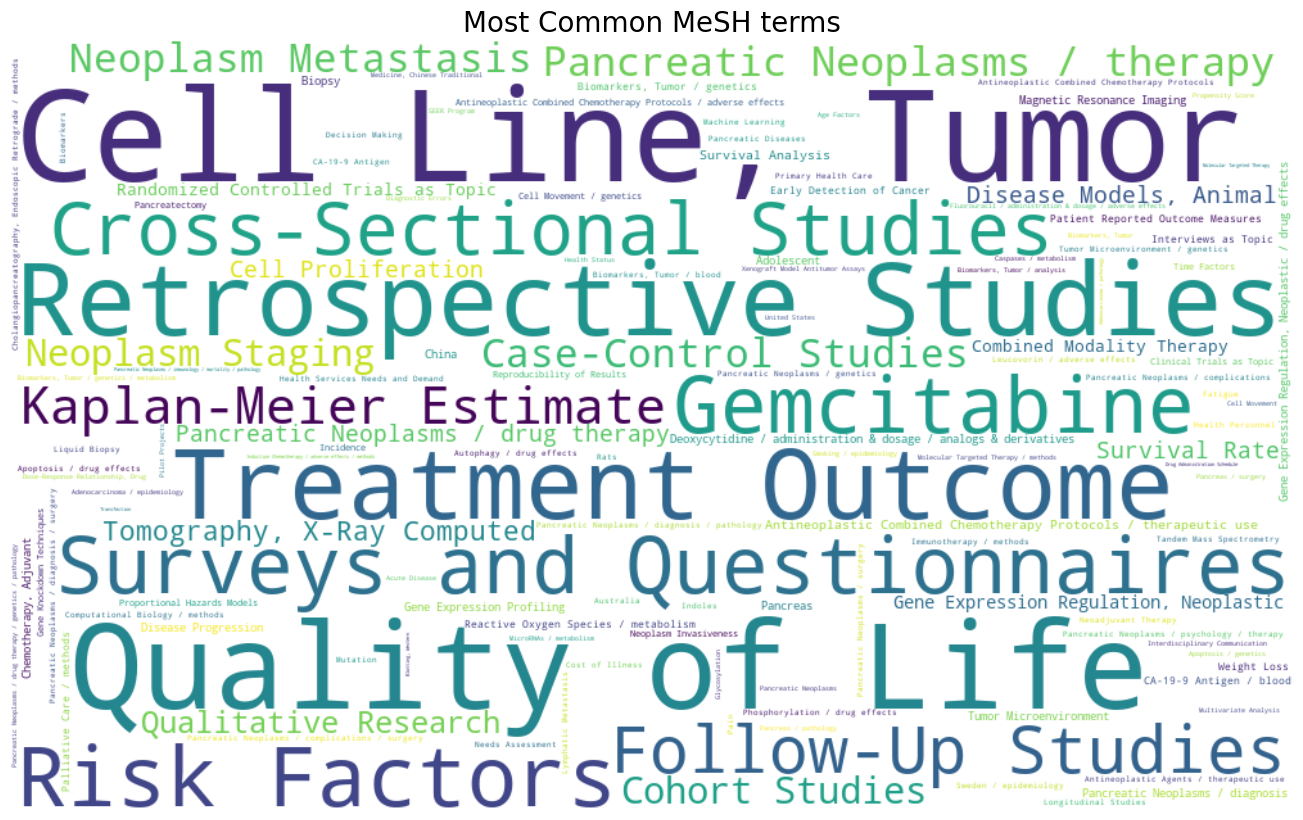

In [ ]:
#remove generic terms and plot wordcloud
generic_terms = {'Humans', 'Male', 'Female', 'Aged', 'Middle Aged', 'Adult', 'Prognosis', 'Animals', 'Mice', 'Aged, 80 and over'}

filtered_mesh = {
    k: v for k, v in mesh_counter.items()
    if not any(gen_term in k for gen_term in generic_terms)
}

filtered_mesh_cleaned = {k.replace('*', '').replace('/', ' / '): v for k, v in filtered_mesh.items()
}

wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(filtered_mesh_cleaned)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common MeSH terms", fontsize=20)
plt.show()

In [ ]:
#count after filtering

from collections import Counter
mesh_counter = Counter(filtered_mesh)
mesh_counter

Counter({'Cell Line, Tumor': 25,
         'Quality of Life': 22,
         'Retrospective Studies': 21,
         'Treatment Outcome': 20,
         'Risk Factors': 15,
         'Surveys and Questionnaires': 13,
         'Gemcitabine': 13,
         'Prospective Studies': 13,
         'Cross-Sectional Studies': 11,
         '*Pancreatic Neoplasms/drug therapy': 10,
         '*Pancreatic Neoplasms/diagnosis': 9,
         'Follow-Up Studies': 9,
         '*Pancreatic Neoplasms/therapy': 8,
         'Kaplan-Meier Estimate': 8,
         'Neoplasm Metastasis': 7,
         'Case-Control Studies': 7,
         'Pancreatic Neoplasms/*therapy': 7,
         'Neoplasm Staging': 6,
         'Gene Expression Regulation, Neoplastic': 6,
         'Cohort Studies': 6,
         '*Quality of Life': 6,
         'Qualitative Research': 6,
         'Tomography, X-Ray Computed': 6,
         '*Pancreatic Neoplasms/pathology': 6,
         'Cell Proliferation': 6,
         'Pancreatic Neoplasms/*drug therapy': 6,
 

### TF-IDF with abstract

In [ ]:
records_abstract = records["Abstract"]
records_abstract

0      Background: Pancreatic ductal adenocarcinoma (...
1      Pancreatic cancer often presents with vague, n...
2      Chronic pancreatitis (CP) is a progressive con...
3      BACKGROUND: Pancreatic cancer is the twelfth m...
4      BACKGROUND: The Pancreatic Cancer Action Netwo...
                             ...                        
400    BACKGROUND: Pancreatic cancer is a deadly dise...
401    [6]-Gingerol, a major phenolic compound derive...
402    A rare syndrome, sinistral (left-sided) portal...
403    The efficacy and safety of gemcitabine at a st...
404    ERCP is a highly accurate and specific method ...
Name: Abstract, Length: 405, dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
sec_titles = {'background', 'objective', 'methods', 'results', 'conclusion'}
STOPWORDS = set(stopwords.words('english'))

#tokenize abstract sentences
records_abstract_lower = records_abstract.str.lower()
records_abstract_lower

0      background: pancreatic ductal adenocarcinoma (...
1      pancreatic cancer often presents with vague, n...
2      chronic pancreatitis (cp) is a progressive con...
3      background: pancreatic cancer is the twelfth m...
4      background: the pancreatic cancer action netwo...
                             ...                        
400    background: pancreatic cancer is a deadly dise...
401    [6]-gingerol, a major phenolic compound derive...
402    a rare syndrome, sinistral (left-sided) portal...
403    the efficacy and safety of gemcitabine at a st...
404    ercp is a highly accurate and specific method ...
Name: Abstract, Length: 405, dtype: object

In [ ]:
#filter out stopwords and generic words, and do lemmatization
lemmatizer = WordNetLemmatizer() #lemmatize words and its inflected forms

clean_abstracts = []

for abstract in records_abstract_lower:
    tokens = word_tokenize(abstract)  #tokenization
    cleaned_token = []

    for word in tokens:
        if word.isalpha():  #remove punctuation and numbers
            if word not in STOPWORDS and word not in sec_titles:
                lemmatized_word = lemmatizer.lemmatize(word)
                cleaned_token.append(lemmatized_word)
    
    clean_abstracts.append(" ".join(cleaned_token))

print(clean_abstracts)

['pancreatic ductal adenocarcinoma pdac typically develops without symptom aggressive progression combined diagnosis underscore critical need improved early detection strategy circulating tumor cell ctc blood potential biomarkers pdac study detection pancreatic ctc evaluated using two diagnostic system comparative approach two distinct nanotheranostic platform developed monoclonal magnetic nanoparticles magnetized exosomes termed magxosomes used monoclonal antibody mesenchymal stem cell msc treated mnps served source magxosomes characterization performed using dynamic light scattering dl inductively coupled plasma mass spectrometry nanoparticle tracking analysis nta transmission electron microscopy tem blood sample collected pancreatic cancer mouse model treated nanotheranostic platform analyzed using homemade magnetic particle spectroscopy mp device detection pancreatic ctc investigated using nanotheranostic platform alongside mp instrument context system demonstrated varying efficien

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(clean_abstracts)

#convert tf-idf matrix to pandas dataframe
pmc_abstracts_tfidf = pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
pmc_abstracts_tfidf.head()

,abdomen,abdominal,aberrantly,ability,ablated,ablation,ablative,able,abnormal,abnormality,...,youngest,yuande,yueqing,zahn,zealand,zero,zeta,zheng,zhengs,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pmc_abstracts_tfidf.shape


(405, 5840)

In [ ]:
#getting mean TF-IDF score per term and rank top 20
mean_tfidf_score = pmc_abstracts_tfidf.mean(axis=0)
top_terms = mean_tfidf_score.sort_values(ascending=False).head(20)
top_terms

pancreatic    0.072237
cancer        0.071573
patient       0.062119
pc            0.037909
tumor         0.031258
treatment     0.029452
cell          0.028908
survival      0.027054
diagnosis     0.026056
symptom       0.025778
early         0.025431
study         0.023892
disease       0.023837
group         0.021437
case          0.019630
clinical      0.019371
rate          0.018635
pdac          0.018459
care          0.018258
therapy       0.018238
dtype: float64

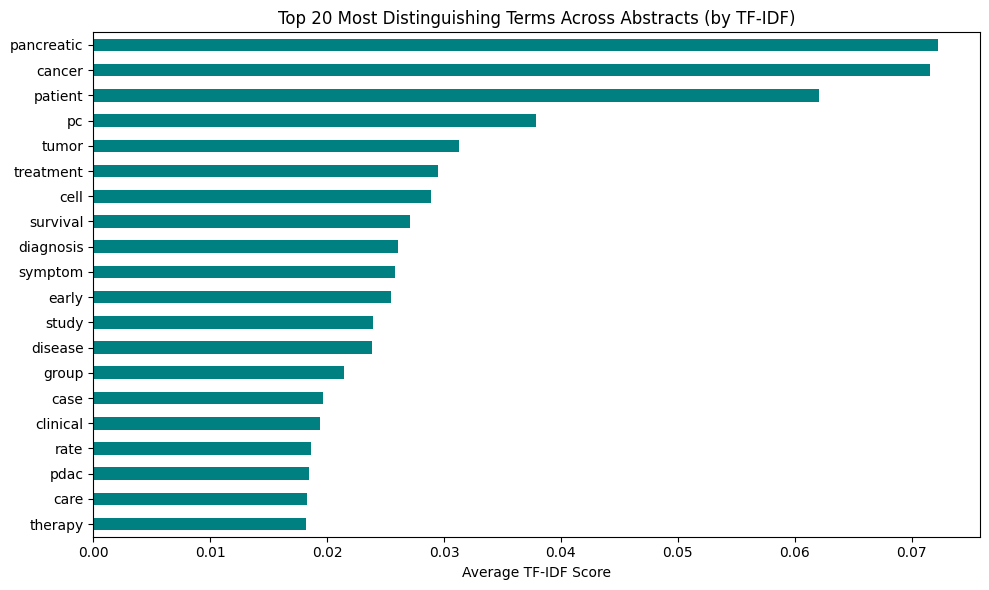

In [ ]:
#visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_terms.plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title("Top 20 Most Distinguishing Terms Across Abstracts (by TF-IDF)")
plt.xlabel("Average TF-IDF Score")
plt.tight_layout()
plt.show()

### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

#determine number of clusters using elbow and inertia
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

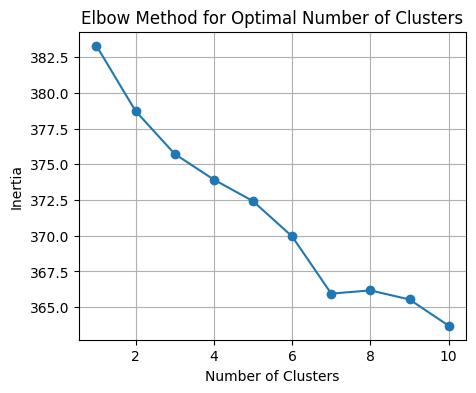

In [ ]:
#visualize to find elbow
plt.figure(figsize=(5, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

### Experiment with Cluster and PCA

In [ ]:
tfidf_matrix

<405x5840 sparse matrix of type '<class 'numpy.float64'>'
	with 36227 stored elements in Compressed Sparse Row format>

#### Try PCA = 50, Cluster = 7

In [27]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

                                              abstract  cluster
0    Background: Pancreatic ductal adenocarcinoma (...        2
1    Pancreatic cancer often presents with vague, n...        1
2    Chronic pancreatitis (CP) is a progressive con...        2
3    BACKGROUND: Pancreatic cancer is the twelfth m...        5
4    BACKGROUND: The Pancreatic Cancer Action Netwo...        5
..                                                 ...      ...
400  BACKGROUND: Pancreatic cancer is a deadly dise...        6
401  [6]-Gingerol, a major phenolic compound derive...        6
402  A rare syndrome, sinistral (left-sided) portal...        1
403  The efficacy and safety of gemcitabine at a st...        5
404  ERCP is a highly accurate and specific method ...        1

[405 rows x 2 columns]


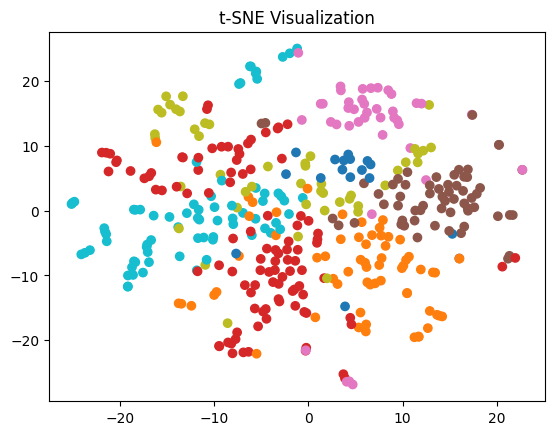

In [ ]:
# Reduce TF-IDF to 50 dimensions for clustering
pca = PCA(n_components=50, random_state=42)
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

#show clustering based on pca
tfidf_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(tfidf_reduced)
plt.scatter(tfidf_tsne[:, 0], tfidf_tsne[:, 1], c=kmeans.labels_, cmap='tab10')
plt.title("t-SNE Visualization")

#7 clusters
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_reduced)

records_with_clusters = records_abstract.copy()
records_with_clusters = records_with_clusters.to_frame(name='abstract')
records_with_clusters['cluster'] = clusters

print(records_with_clusters)


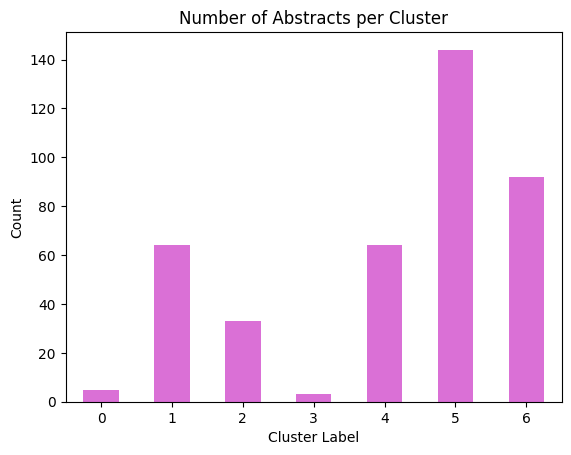

In [ ]:
records_with_clusters['cluster'].value_counts().sort_index().plot(kind='bar', color='orchid')
plt.title("Number of Abstracts per Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Get the centroid of each cluster in original TF-IDF space
centroids = kmeans.cluster_centers_ @ pca.components_  # project back into TF-IDF space
top_indices = np.argsort(centroids, axis=1)[:, -10:]   # top 10 terms per cluster

terms = tfidf_vectorizer.get_feature_names_out()

for i, indices in enumerate(top_indices):
    print(f"\nCluster {i} top terms:")
    print([terms[idx] for idx in reversed(indices)])

sil_score = silhouette_score(tfidf_reduced, clusters)
print(f"Silhouette Score: {sil_score}")



Cluster 0 top terms:
['pdac', 'ci', 'risk', 'factor', 'nod', 'detection', 'user', 'auc', 'study', 'sensitivity']

Cluster 1 top terms:
['case', 'aip', 'biliary', 'obstruction', 'duodenal', 'stent', 'rare', 'report', 'revealed', 'presentation']

Cluster 2 top terms:
['pdac', 'model', 'mouse', 'ductal', 'cell', 'prediction', 'auc', 'claim', 'adc', 'sensitivity']

Cluster 3 top terms:
['pro', 'qol', 'instrument', 'patient', 'life', 'measure', 'quality', 'management', 'tool', 'eortc']

Cluster 4 top terms:
['cancer', 'pancreatic', 'early', 'diagnosis', 'detection', 'screening', 'factor', 'ai', 'risk', 'stage']

Cluster 5 top terms:
['patient', 'care', 'group', 'pain', 'month', 'survival', 'quality', 'median', 'score', 'life']

Cluster 6 top terms:
['cell', 'pc', 'expression', 'gene', 'tumor', 'resistance', 'mechanism', 'growth', 'effect', 'target']
Silhouette Score: 0.04952475433828353


#### Try PCA = 10, Cluster = 7

Text(0.5, 1.0, 't-SNE Visualization')

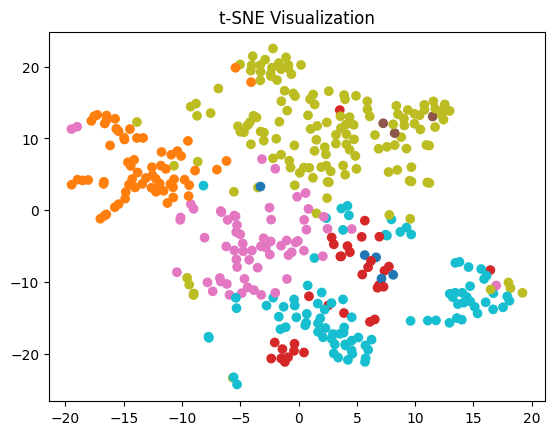

In [ ]:
#Clustering abstracts by topic
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Reduce TF-IDF to 10 dimensions for clustering
pca = PCA(n_components=10, random_state=42)
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

#show clustering based on pca
tfidf_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(tfidf_reduced)
plt.scatter(tfidf_tsne[:, 0], tfidf_tsne[:, 1], c=kmeans.labels_, cmap='tab10')
plt.title("t-SNE Visualization")



                                              abstract  cluster
0    Background: Pancreatic ductal adenocarcinoma (...        3
1    Pancreatic cancer often presents with vague, n...        2
2    Chronic pancreatitis (CP) is a progressive con...        0
3    BACKGROUND: Pancreatic cancer is the twelfth m...        6
4    BACKGROUND: The Pancreatic Cancer Action Netwo...        6
..                                                 ...      ...
400  BACKGROUND: Pancreatic cancer is a deadly dise...        3
401  [6]-Gingerol, a major phenolic compound derive...        3
402  A rare syndrome, sinistral (left-sided) portal...        2
403  The efficacy and safety of gemcitabine at a st...        2
404  ERCP is a highly accurate and specific method ...        2

[405 rows x 2 columns]


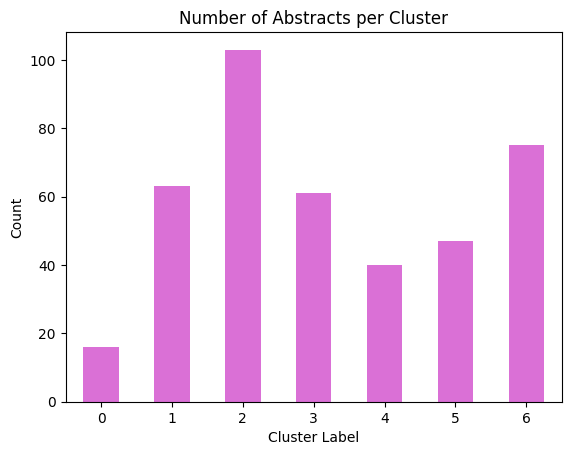

In [ ]:
#7 clusters
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_reduced)

records_with_clusters = records_abstract.copy()
records_with_clusters = records_with_clusters.to_frame(name='abstract')
records_with_clusters['cluster'] = clusters

print(records_with_clusters)

records_with_clusters['cluster'].value_counts().sort_index().plot(kind='bar', color='orchid')
plt.title("Number of Abstracts per Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:

import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Get the centroid of each cluster in original TF-IDF space
centroids = kmeans.cluster_centers_ @ pca.components_  # project back into TF-IDF space
top_indices = np.argsort(centroids, axis=1)[:, -10:]   # top 10 terms per cluster

terms = tfidf_vectorizer.get_feature_names_out()

for i, indices in enumerate(top_indices):
    print(f"\nCluster {i} top terms:")
    print([terms[idx] for idx in reversed(indices)])

sil_score = silhouette_score(tfidf_reduced, clusters)
print(f"Silhouette Score: {sil_score}")



Cluster 0 top terms:
['pdac', 'ductal', 'ci', 'factor', 'risk', 'adenocarcinoma', 'cell', 'model', 'nod', 'cp']

Cluster 1 top terms:
['cancer', 'pancreatic', 'early', 'diagnosis', 'detection', 'screening', 'stage', 'factor', 'review', 'risk']

Cluster 2 top terms:
['case', 'gemcitabine', 'biliary', 'obstruction', 'chemotherapy', 'duodenal', 'aip', 'stent', 'lapc', 'report']

Cluster 3 top terms:
['cell', 'expression', 'growth', 'gene', 'cancer', 'apoptosis', 'effect', 'tumor', 'mouse', 'mechanism']

Cluster 4 top terms:
['pc', 'aip', 'biomarkers', 'mirnas', 'metabolic', 'circulating', 'development', 'early', 'exosomes', 'ctc']

Cluster 5 top terms:
['group', 'survival', 'gene', 'patient', 'model', 'month', 'analysis', 'detection', 'tumor', 'expression']

Cluster 6 top terms:
['care', 'patient', 'need', 'intervention', 'life', 'quality', 'psychological', 'distress', 'nutritional', 'score']
Silhouette Score: 0.19359154109353072


#### Try PCA = 50, Cluster = 5

                                              abstract  cluster
0    Background: Pancreatic ductal adenocarcinoma (...        2
1    Pancreatic cancer often presents with vague, n...        1
2    Chronic pancreatitis (CP) is a progressive con...        4
3    BACKGROUND: Pancreatic cancer is the twelfth m...        3
4    BACKGROUND: The Pancreatic Cancer Action Netwo...        3
..                                                 ...      ...
400  BACKGROUND: Pancreatic cancer is a deadly dise...        2
401  [6]-Gingerol, a major phenolic compound derive...        2
402  A rare syndrome, sinistral (left-sided) portal...        1
403  The efficacy and safety of gemcitabine at a st...        0
404  ERCP is a highly accurate and specific method ...        1

[405 rows x 2 columns]


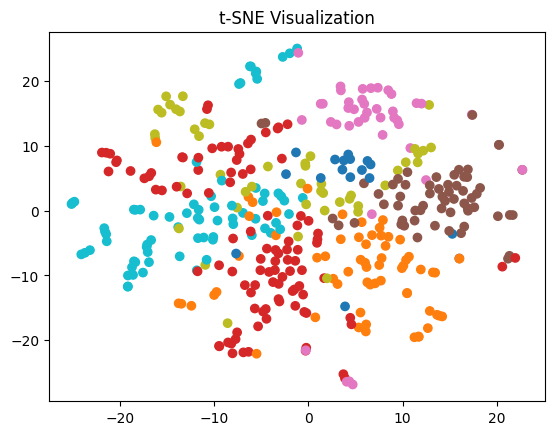

In [ ]:
#Clustering abstracts by topic
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Reduce TF-IDF to 50 dimensions for clustering
pca = PCA(n_components=50, random_state=42)
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

#show clustering based on pca
tfidf_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(tfidf_reduced)
plt.scatter(tfidf_tsne[:, 0], tfidf_tsne[:, 1], c=kmeans.labels_, cmap='tab10')
plt.title("t-SNE Visualization")

#5 clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_reduced)

records_with_clusters = records_abstract.copy()
records_with_clusters = records_with_clusters.to_frame(name='abstract')
records_with_clusters['cluster'] = clusters

print(records_with_clusters)

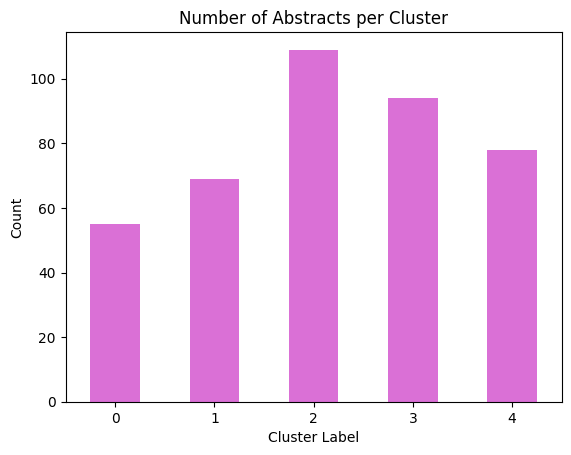

In [ ]:
records_with_clusters['cluster'].value_counts().sort_index().plot(kind='bar', color='orchid')
plt.title("Number of Abstracts per Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Get the centroid of each cluster in original TF-IDF space
centroids = kmeans.cluster_centers_ @ pca.components_  # project back into TF-IDF space
top_indices = np.argsort(centroids, axis=1)[:, -10:]   # top 10 terms per cluster

terms = tfidf_vectorizer.get_feature_names_out()

for i, indices in enumerate(top_indices):
    print(f"\nCluster {i} top terms:")
    print([terms[idx] for idx in reversed(indices)])

sil_score = silhouette_score(tfidf_reduced, clusters)
print(f"Silhouette Score: {sil_score}")


Cluster 0 top terms:
['group', 'ci', 'survival', 'patient', 'median', 'gemcitabine', 'month', 'day', 'chemotherapy', 'sbrt']

Cluster 1 top terms:
['case', 'aip', 'biliary', 'obstruction', 'duodenal', 'stent', 'rare', 'report', 'revealed', 'presentation']

Cluster 2 top terms:
['cell', 'pc', 'expression', 'gene', 'growth', 'tumor', 'target', 'resistance', 'protein', 'mouse']

Cluster 3 top terms:
['care', 'patient', 'pain', 'score', 'quality', 'life', 'nutritional', 'pert', 'qol', 'psychological']

Cluster 4 top terms:
['cancer', 'early', 'pancreatic', 'detection', 'diagnosis', 'factor', 'screening', 'stage', 'risk', 'ai']
Silhouette Score: 0.05580606800726418


#### Try PCA = 10, Cluster = 5

Text(0.5, 1.0, 't-SNE Visualization')

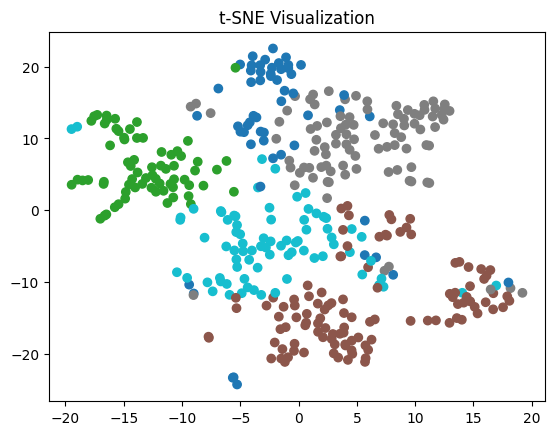

In [ ]:
#Clustering abstracts by topic
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Reduce TF-IDF to 10 dimensions for clustering
pca = PCA(n_components=10, random_state=42)
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

#show clustering based on pca
tfidf_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(tfidf_reduced)
plt.scatter(tfidf_tsne[:, 0], tfidf_tsne[:, 1], c=kmeans.labels_, cmap='tab10')
plt.title("t-SNE Visualization")


                                              abstract  cluster
0    Background: Pancreatic ductal adenocarcinoma (...        3
1    Pancreatic cancer often presents with vague, n...        1
2    Chronic pancreatitis (CP) is a progressive con...        0
3    BACKGROUND: Pancreatic cancer is the twelfth m...        1
4    BACKGROUND: The Pancreatic Cancer Action Netwo...        2
..                                                 ...      ...
400  BACKGROUND: Pancreatic cancer is a deadly dise...        3
401  [6]-Gingerol, a major phenolic compound derive...        3
402  A rare syndrome, sinistral (left-sided) portal...        2
403  The efficacy and safety of gemcitabine at a st...        2
404  ERCP is a highly accurate and specific method ...        2

[405 rows x 2 columns]


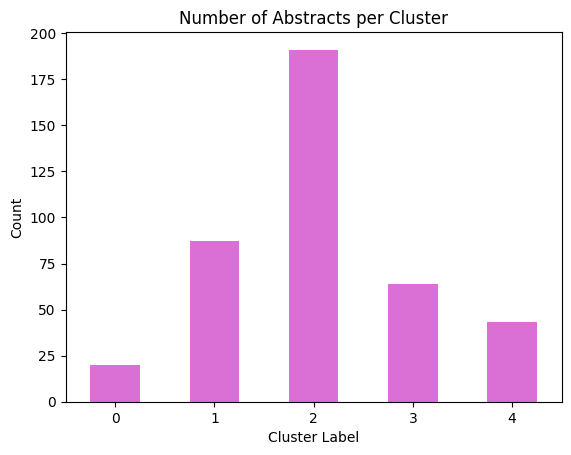

In [ ]:
#5 clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_reduced)

records_with_clusters = records_abstract.copy()
records_with_clusters = records_with_clusters.to_frame(name='abstract')
records_with_clusters['cluster'] = clusters

print(records_with_clusters)
records_with_clusters['cluster'].value_counts().sort_index().plot(kind='bar', color='orchid')
plt.title("Number of Abstracts per Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Get the centroid of each cluster in original TF-IDF space
centroids = kmeans.cluster_centers_ @ pca.components_  # project back into TF-IDF space
top_indices = np.argsort(centroids, axis=1)[:, -10:]   # top 10 terms per cluster

terms = tfidf_vectorizer.get_feature_names_out()

for i, indices in enumerate(top_indices):
    print(f"\nCluster {i} top terms:")
    print([terms[idx] for idx in reversed(indices)])

sil_score = silhouette_score(tfidf_reduced, clusters)
print(f"Silhouette Score: {sil_score}")


Cluster 0 top terms:
['pdac', 'ci', 'ductal', 'risk', 'model', 'factor', 'adenocarcinoma', 'nod', 'cp', 'biomarkers']

Cluster 1 top terms:
['cancer', 'pancreatic', 'early', 'diagnosis', 'detection', 'screening', 'stage', 'factor', 'risk', 'diagnostic']

Cluster 2 top terms:
['patient', 'care', 'pain', 'month', 'life', 'quality', 'palliative', 'chemotherapy', 'day', 'group']

Cluster 3 top terms:
['cell', 'expression', 'gene', 'growth', 'apoptosis', 'effect', 'cancer', 'mouse', 'tumor', 'assay']

Cluster 4 top terms:
['pc', 'aip', 'biomarkers', 'mirnas', 'metabolic', 'circulating', 'development', 'exosomes', 'early', 'ctc']
Silhouette Score: 0.1667387246855924
